<a href="https://colab.research.google.com/github/2022M3T1/Projeto4/blob/main/notebooks/colab_Modelos_finais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ambientação do notebook

In [ ]:
!pip install -U -q PyDrive
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação de bibliotecas 
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# Autenticação de conta.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Faz o download do arquivo csv para a máquina.
downloaded = drive.CreateFile({'id': '1-EL5jV5m_7zJi-rKgDXMAcCSrTGkq7z2'})
downloaded.GetContentFile('not_client.csv')
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [ ]:
# Dados lidos do arquvio csv.
client = pd.read_csv('client.csv')
not_client = pd.read_csv('not_client.csv')

#Engajado

###Treinamento Teste

Na cédula abaixo nós temos a divisão da tabela entre treinamento e teste, note que estamos defifindo 80% dos dados para treinamento e 20% para os testes. Outro fator importante, é que usamos o random_state que faz com que a população de dados seja a mesma do início ao fim do notebook e isso garante que podemos comparar os modelos entre si e observar o índice de acerto daquele mesmo conjunto. 

In [ ]:
from sklearn.model_selection import train_test_split

cols = [ "num_produtos","qtd_oper"] #Features que usaremos para treinar o modelo.

# Dividindo x e y
x = client[cols]
y = client['ind_engaj']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###Random Forest

In [ ]:
rdf_engajado = RandomForestClassifier(criterion='entropy', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
rdf_engajado.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_rdf_engajado = rdf_engajado.predict(x_test) # Guarda a predição do teste na variável.
y_pred_rdf_engajado

array([1., 1., 1., ..., 0., 0., 0.])

####Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_rdf_engajado) # Mostra a acurácia do modelo.

0.9882451043684097

Precisão

In [ ]:
precision_score(y_test, y_pred_rdf_engajado) # Mostra a precisão do modelo.

0.9670421044674579

Recall

In [ ]:
recall_score(y_test, y_pred_rdf_engajado) # Mostra a revocação do modelo.

0.9999218383617321

Matriz de confusão

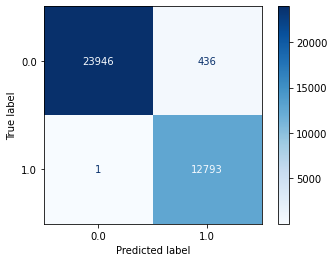

In [ ]:
plot_confusion_matrix(rdf_engajado,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Deploy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from joblib import dump

dump(rdf_engajado, '/content/drive/MyDrive/Colab Notebooks/modelos/modelo_engajado.model')

FileNotFoundError: ignored

#Novo Cliente

##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_credito', 'vlr_renda', 'qtd_restr', "vlr_score"] #Features que usaremos para treinar o modelo.

# Dividindo x e y
x = not_client[cols]
y = not_client['ind_novo_cli']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

##Random Forest

In [ ]:
rdf_novo_cliente = RandomForestClassifier(criterion='entropy',
                                          max_depth=40,
                                          n_estimators=80,
                                          random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
rdf_novo_cliente.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=80,
                       random_state=42)

In [ ]:
y_pred_rdf_novo_cliente = rdf_novo_cliente.predict(x_test) # Guarda a predição do teste na variável.
y_pred_rdf_novo_cliente

array([0., 0., 0., ..., 0., 1., 1.])

####Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_rdf_novo_cliente) # Mostra a acurácia do modelo.

1.0

Precisão

In [ ]:
precision_score(y_test, y_pred_rdf_novo_cliente) # Mostra a precisão do modelo.

1.0

Recall

In [ ]:
recall_score(y_test, y_pred_rdf_novo_cliente) # Mostra a revocação do modelo.

1.0

Matriz de confusão

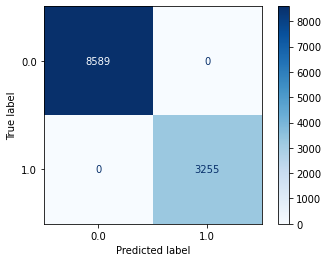

In [ ]:
plot_confusion_matrix(rdf_novo_cliente,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Deploy

In [ ]:
dump(rdf_novo_cliente, '/content/drive/MyDrive/Colab Notebooks/modelos/modelo_novo_cliente.model')

FileNotFoundError: ignored

#Cliente atritado

##Undersampling de não atritados

In [ ]:
import numpy as np # importa a biblioteca numpy


cliente_atrito = client[client.ind_atrito == 1] #
cliente_atrito

In [ ]:
cliente_not_atrito = client[client.ind_atrito == 0]
cliente_not_atrito

In [ ]:
cliente_not_atrito_sample = cliente_not_atrito.sample(frac=.01, random_state=42)
cliente_not_atrito_sample

In [ ]:
client_sample = pd.concat([cliente_atrito, cliente_not_atrito_sample]) 
client_sample

##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

cols = ['vlr_saldo','vlr_credito', 'num_atend_atrs', 'qtd_reclm','vlr_renda','num_atend', 'num_produtos', 'qtd_oper', 'vlr_score', 'qtd_restr'] #Features que usaremos para treinar o modelo.


# Dividindo x e y
x = client_sample[cols]
y = client_sample['ind_atrito']

print(y.shape, y[y==1].shape)


sm = SMOTE(random_state=42, sampling_strategy="auto")
X_res, y_res = sm.fit_resample(x, y)

print(y_res.shape, y_res[y_res==0].shape, y_res[y_res==1].shape)

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
# Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
rdf_atritado = RandomForestClassifier() 
rdf_atritado.fit(x_train, y_train) # Treina o modelo.


In [ ]:
y_pred_rdf_atritado = rdf_atritado.predict(x_test) # Guarda a predição do teste na variável.

###Metricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred_rdf_atritado) # Mostra a acurácia do modelo.

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf_atritado) # Mostra a precisão do modelo.

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf_atritado) # Mostra a revocação do modelo.

In [ ]:
plot_confusion_matrix(rdf_atritado,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Deploy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from joblib import dump

dump(rdf_atritado, '/content/drive/MyDrive/Colab Notebooks/modelos/modelo_atritado.model')